In [1]:
# import common packages
import os
import numpy as np

from matplotlib import pyplot
from matplotlib.pyplot import *
import seaborn as sns

import scipy
import sklearn


In [2]:
# import the algorithm class

from MF_model import MF_model

In [3]:
# import a simple function generating synthetic example and the corresponding visualization function

from generate_synthetic import simulation_Ex1, plot_decomposition

## Noiseless synthetic example

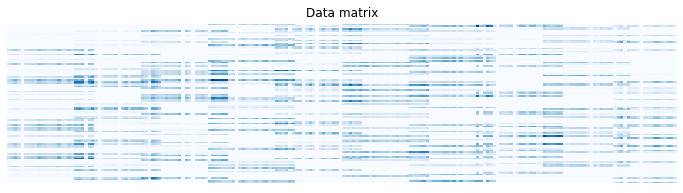

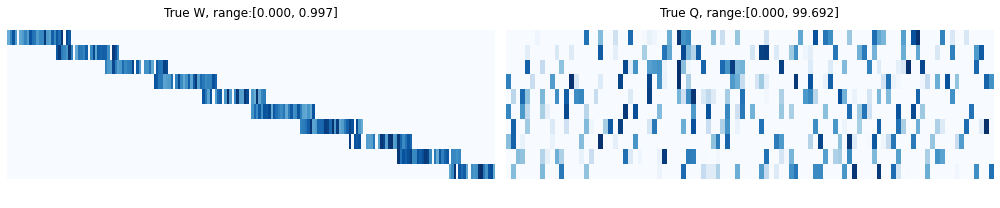

In [16]:
# Objective: decomposition input matrix P into P = W Q'
# In this synthetic example, the input P is of size 200 x 100
# The true W and true Q are known for evaluation
# The blocks in true W is set to have a 5 units of overlap (introduce some correlation between dimensions)
# The intrinsic dimension is 10
# no extra gaussian is introduced to the input matrix in this example

true_W, true_Q, _, P_clean, P = simulation_Ex1(200, 100, 10, 5, noise=False)

# save data for record
os.makedirs('./Example-synthetic/', exist_ok=True)
np.savez('./Example-synthetic/synthetic_clean.npz', P=P, data_mask=np.ones_like(P), C=None)

In [17]:
# initialize the model
# data_matrix = P
# data_mask = np.ones_like(P) means all data entries are available (See function's comment for details)
# dimension = 15 : set if the desired/true dimension is known. Can be estimated by 'BIC_dimension'
# regularizer = 1 : L1 regularizer is used (for sparsity control)
# method = 'admm' : algorithm that allows setting an upper bound constraints to W and Q
# Wbound = (True, 1.0) : We set an upper bound to every entries of W to be 1.0.
#                        This setting is problem dependent.
#                        Useful for improving intrepretability of the representation in some scenario
# reg_parameter : hyperparmeter controlling the strength of the regularization

model = MF_model(P,
                 np.ones_like(P),
                 15,
                 regularizer=1,
                 method='admm',
                 Wbound=(True, 1.0),
                 reg_parameter=0.01)

Loss: 1.641e+06:  49%|████████████▎            | 98/200 [00:02<00:03, 33.56it/s]


Algorithm converged with relative error < 0.0001.


Loss: 1.232e+06:  60%|██████████████▌         | 121/200 [00:04<00:02, 28.02it/s]


Algorithm converged with relative error < 0.0001.


Loss: 9.856e+05:  98%|███████████████████████▋| 197/200 [00:14<00:00, 13.64it/s]


Algorithm converged with relative error < 0.0001.


Loss: 6.369e+05:  70%|████████████████▋       | 139/200 [00:11<00:05, 12.12it/s]


Algorithm converged with relative error < 0.0001.


Loss: 1.399e+04:  72%|█████████████████▎      | 144/200 [00:12<00:04, 11.44it/s]


Algorithm converged with relative error < 0.0001.


Loss: 1.399e+04:  72%|█████████████████▎      | 144/200 [00:12<00:05, 11.10it/s]


Algorithm converged with relative error < 0.0001.


Loss: 1.399e+04:  72%|█████████████████▎      | 144/200 [00:13<00:05, 11.01it/s]


Algorithm converged with relative error < 0.0001.


Loss: 1.399e+04:  72%|█████████████████▎      | 144/200 [00:13<00:05, 10.98it/s]


Algorithm converged with relative error < 0.0001.


Loss: 1.399e+04:  72%|█████████████████▎      | 144/200 [00:13<00:05, 10.51it/s]


Algorithm converged with relative error < 0.0001.


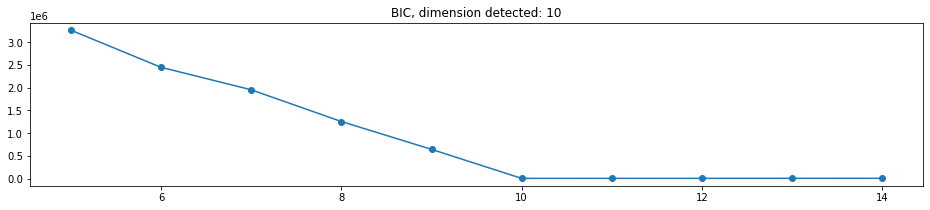

Loss: 1.399e+04:  72%|█████████████████▎      | 144/200 [00:12<00:04, 11.66it/s]


Algorithm converged with relative error < 0.0001.


Loss: 1.399e+04:  72%|█████████████████▎      | 144/200 [00:12<00:04, 11.54it/s]

Algorithm converged with relative error < 0.0001.


In [18]:
# During initialization, we set dimension = 15.
# Alternatively, we could determine the dimension using BIC. 
# If we know that the dimension should be between 5 and 15, we could estimate the optimal dimension by:

model.BIC_dimension(plot=True, search_range=np.arange(5, 15))

# Once BIC_dimension is estimated, the model's dimension will be updated to the optimal one.
# We can then perform decomposition as follow:

W, Q = model.decomposition()

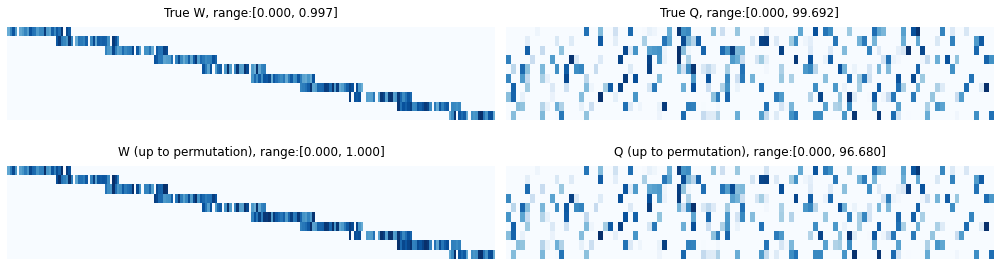

In [19]:
# Visualization the results and compare with the groundtruth solution
plot_decomposition(W, Q, true_W, true_Q)

## Synthetic example with noise added

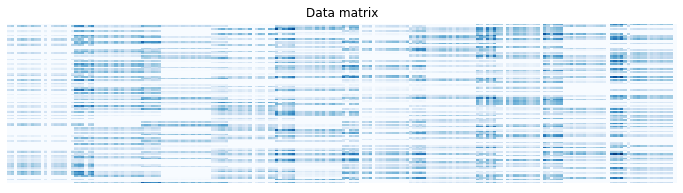

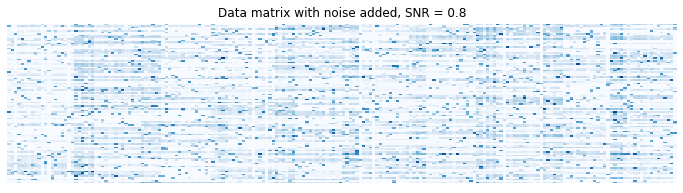

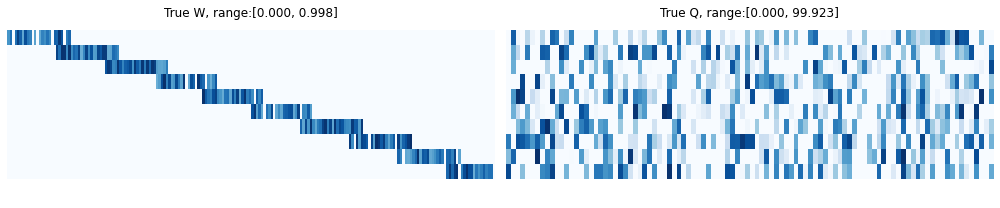

In [22]:
true_W, true_Q, _, P_clean, P = simulation_Ex1(200, 100, 10, 5, 0.5, noise=True, SNR=0.8)

os.makedirs('./Example-synthetic/', exist_ok=True)
np.savez('./Example-synthetic/synthetic_noise.npz', P=P, data_mask=np.ones_like(P), C=None)

Loss: 1.217e+07:  29%|████████████████████▏                                                 | 144/500 [00:01<00:04, 82.07it/s]


Algorithm converged with relative error < 0.0001.


Loss: 1.159e+07:  33%|██████████████████████▊                                               | 163/500 [00:02<00:04, 80.39it/s]


Algorithm converged with relative error < 0.0001.


Loss: 1.111e+07:  38%|██████████████████████████▍                                           | 189/500 [00:03<00:04, 62.41it/s]


Algorithm converged with relative error < 0.0001.


Loss: 1.074e+07:  34%|████████████████████████                                              | 172/500 [00:02<00:05, 60.74it/s]


Algorithm converged with relative error < 0.0001.


Loss: 1.026e+07:  35%|████████████████████████▊                                             | 177/500 [00:02<00:05, 59.47it/s]


Algorithm converged with relative error < 0.0001.


Loss: 9.877e+06:  49%|██████████████████████████████████▎                                   | 245/500 [00:04<00:04, 57.31it/s]


Algorithm converged with relative error < 0.0001.


Loss: 9.72e+06:  37%|██████████████████████████▎                                            | 185/500 [00:03<00:05, 55.56it/s]


Algorithm converged with relative error < 0.0001.


Loss: 9.491e+06:  46%|████████████████████████████████▏                                     | 230/500 [00:04<00:05, 53.37it/s]


Algorithm converged with relative error < 0.0001.


Loss: 9.375e+06:  39%|███████████████████████████▍                                          | 196/500 [00:03<00:05, 51.50it/s]


Algorithm converged with relative error < 0.0001.


Loss: 9.091e+06:  53%|█████████████████████████████████████▍                                | 267/500 [00:05<00:04, 50.03it/s]


Algorithm converged with relative error < 0.0001.


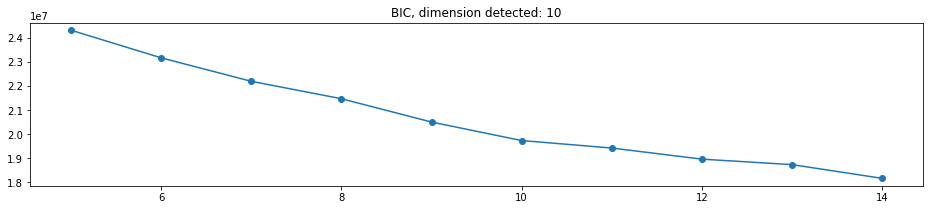

Loss: 1.001e+07:  36%|█████████████████████████                                             | 179/500 [00:03<00:05, 57.05it/s]


Algorithm converged with relative error < 0.0001.


Loss: 9.886e+06:  42%|█████████████████████████████▍                                        | 210/500 [00:03<00:05, 56.85it/s]

Algorithm converged with relative error < 0.0001.


In [24]:
# Instead of using the default L1-regularizer (sparsity enhanced), we use L2-regularizer
# L2 is sometimes more preferrable when the input data is dense, i.e., the case with low SNR

model = MF_model(P,
                 np.ones_like(P),
                 15,
                 regularizer=2,
                 method='admm',
                 Wbound=(True, 1.0),
                 reg_parameter=0.01,
                 max_iter=500)

model.BIC_dimension(plot=True, search_range=np.arange(5, 15))

# Once BIC_dimension is estimated, the model's dimension will be updated to the optimal one.
# We can then perform decomposition as follow:

W, Q = model.decomposition()

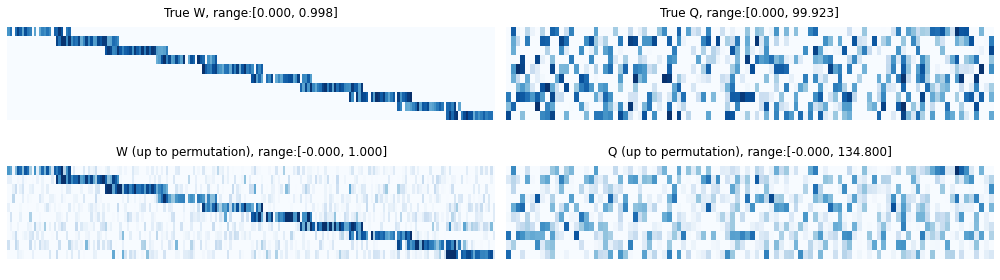

In [25]:
plot_decomposition(W, Q, true_W, true_Q)

## Synthetic example with cofounders

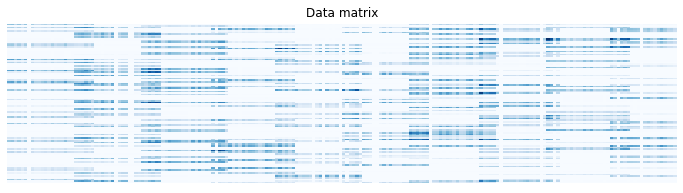

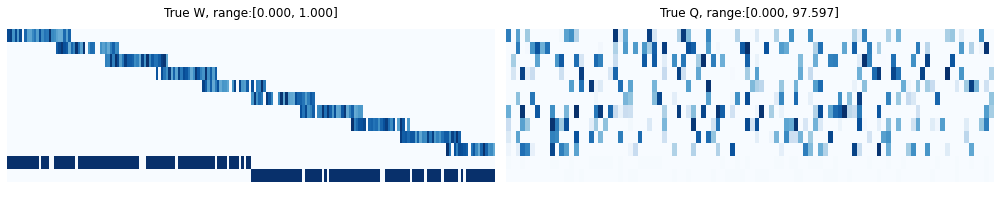

In [4]:
# Sometimes we would like to remove the effect of cofounders such as Age and Sex.
# The purpose of including the cofounder information "C" is to remove the effect of cofounders
# during the factorization.

true_W, true_Q, C, P_clean, P = simulation_Ex1(200, 100, 10, 5, noise=False, cofounder=True)

Loss: 1.934e+06:  26%|██████▏                 | 130/500 [00:02<00:05, 61.92it/s]


Algorithm converged with relative error < 0.0001.


Loss: 1.477e+06:  39%|█████████▍              | 196/500 [00:03<00:04, 62.87it/s]


Algorithm converged with relative error < 0.0001.


Loss: 1.05e+06:  48%|███████████▉             | 238/500 [00:04<00:04, 57.89it/s]


Algorithm converged with relative error < 0.0001.


Loss: 8.052e+05:  25%|█████▉                  | 124/500 [00:02<00:06, 55.62it/s]


Algorithm converged with relative error < 0.0001.


Loss: 3.396e+05:  42%|██████████▏             | 211/500 [00:03<00:05, 55.04it/s]


Algorithm converged with relative error < 0.0001.


Loss: 3.392e+04:  33%|███████▉                | 165/500 [00:03<00:06, 53.72it/s]


Algorithm converged with relative error < 0.0001.


Loss: 3.211e+04:  24%|█████▋                  | 119/500 [00:02<00:07, 51.43it/s]


Algorithm converged with relative error < 0.0001.


Loss: 3.14e+04:  30%|███████▌                 | 152/500 [00:03<00:07, 49.21it/s]


Algorithm converged with relative error < 0.0001.


Loss: 3.14e+04:  30%|███████▌                 | 152/500 [00:03<00:07, 47.93it/s]


Algorithm converged with relative error < 0.0001.


Loss: 3.14e+04:  30%|███████▌                 | 152/500 [00:03<00:07, 47.10it/s]


Algorithm converged with relative error < 0.0001.


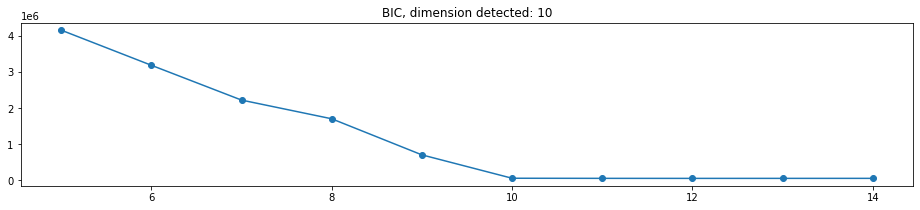

Loss: 3.392e+04:  33%|███████▉                | 165/500 [00:03<00:06, 53.02it/s]


Algorithm converged with relative error < 0.0001.


Loss: 3.392e+04:  33%|███████▉                | 165/500 [00:03<00:06, 53.25it/s]

Algorithm converged with relative error < 0.0001.


In [5]:
model = MF_model(P, np.ones_like(P), 15, C=C, regularizer=2,
                 method='admm', Wbound=(True, 1.0), reg_parameter=0.1,
                 max_iter=500)

model.BIC_dimension(plot=True, search_range=np.arange(5, 15))

# Once BIC_dimension is estimated, the model's dimension will be updated to the optimal one.
# We can then perform decomposition as follow:

W, Q = model.decomposition()

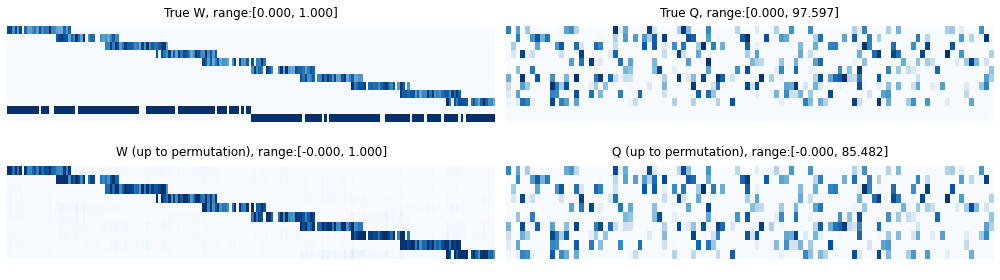

In [6]:
plot_decomposition(W, Q, true_W, true_Q)